Final Analysis 

There are a couple of observations and inferences that can be concluded based on the data provided to us through the figures and tables. One of them being how when it comes to the genders of the mice according to the pie plot theres not much of a difference except for a 2% higher when it comes to males but between both genders it was pretty much equal.
Secondly as the Box plot/summary statistics chart shows it can be stated that Capomulin and Ramicane both had the lowest overall average tumor volumes, as well as relatively low variance, standard deviation, and SEM, which suggests that the results for those two regimens were more positive and more consistent than the other regimens studied. Each of these had tumor volumes at 40.675 mm3 and 40.216 mm3 respectively, while all other regimens were recorded to have volumes of >52 mm3. Lastly the datapoint that popped out to me the most would be during the scatter plot when calculating the correlation between mouse weight and average tumor for the Capomulin regimen. In the plot it can be seen that as the weight of the mouse increases so does the Average tumor volume which can lead one to infer that the weight of the mice has an impact on the effectiveness of the drug regimen. 




In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left")

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
num_mice = len(merged_df["Mouse ID"].unique())
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = merged_df.loc[merged_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
dup_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_id = merged_df.loc[merged_df['Mouse ID'] == 'g989', :]
dup_mice_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_df = merged_df[merged_df['Mouse ID'] != 'g989']
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df["Mouse ID"].unique())

248

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_stat = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).mean()
median_stat = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).median()
variance_stat = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).var()
std_stat = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).std()
sem_stat = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean_stat, 
                            "Median Tumor Volume":median_stat, 
                           "Tumor Volume Variance":variance_stat, 
                           "Tumor Volume Std. Deviation.":std_stat, 
                           "Tumor Volume Std. Error.":sem_stat})
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Deviation.,Tumor Volume Std. Error.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

summary_agg = cleaned_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

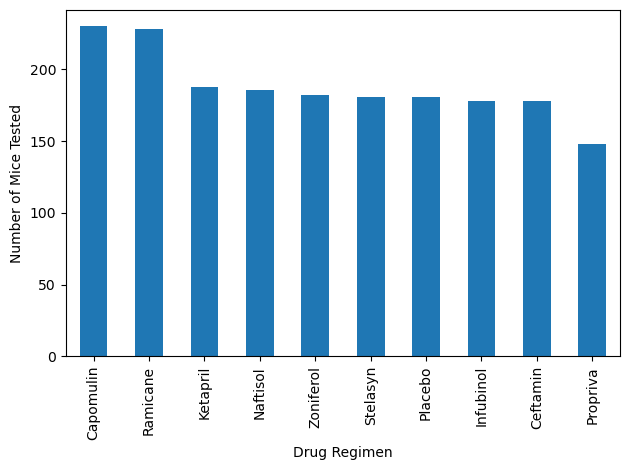

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_reg = cleaned_df["Drug Regimen"].value_counts()
drug_reg

drug_chart = drug_reg.plot(kind='bar')
drug_chart.set_xlabel("Drug Regimen")
drug_chart.set_ylabel("Number of Mice Tested")

plt.tight_layout()
plt.show()

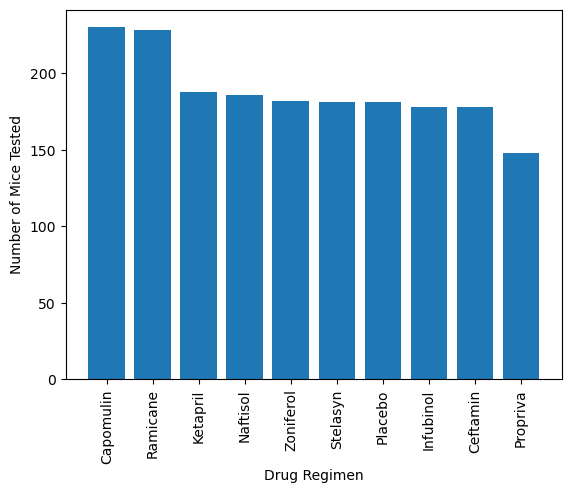

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_reg = cleaned_df["Drug Regimen"].value_counts()

plt.bar(drug_reg.index.values,drug_reg.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")

plt.show()

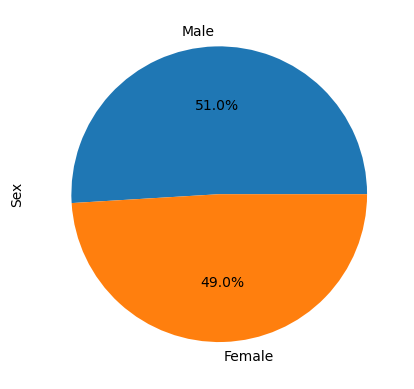

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender = cleaned_df["Sex"].value_counts()
gender

gender.plot(kind="pie",autopct='%1.1f%%')
plt.show()

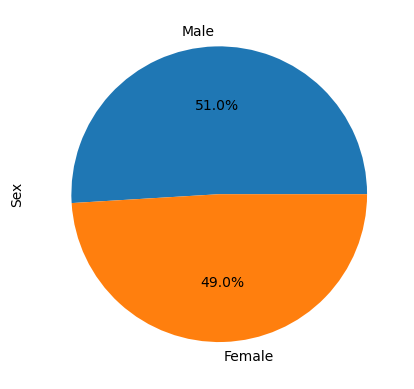

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender=cleaned_df["Sex"].value_counts()
gender

plt.ylabel("Sex")
plt.pie(gender.values, labels=gender.index.values, autopct='%1.1f%%')
plt.show()

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = cleaned_df.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

tumor_vol_merged = max_tumor.merge(cleaned_df,on=['Mouse ID','Timepoint'],how="left")
tumor_vol_merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = tumor_vol_merged.loc[tumor_vol_merged["Drug Regimen"] == drug, 'Tumor Volume (mm3)']

    # add subset 
    tumor_vol_data.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
    # print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
    # print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
    # print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # print(f"Values below {lower_bound} could be outliers.")
    # print(f"Values above {upper_bound} could be outliers.")
    
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<function matplotlib.pyplot.show(close=None, block=None)>

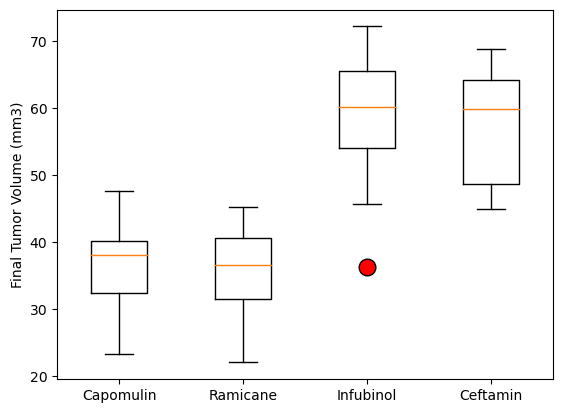

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_vol_data, labels = treatment_list,flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show

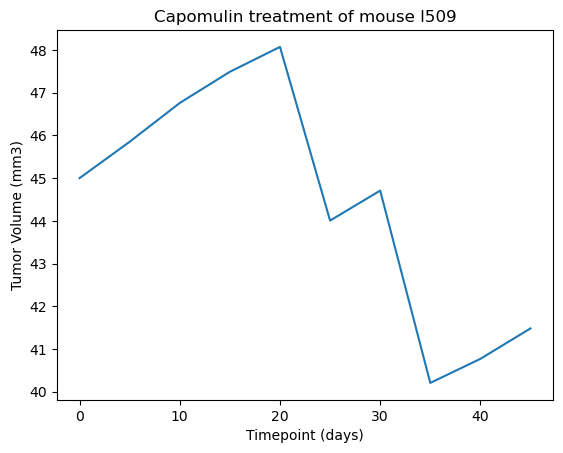

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

cap_mice = cleaned_df.loc[cleaned_df['Drug Regimen'] == "Capomulin"]
capmousedata = cap_mice.loc[cap_mice['Mouse ID']== 'l509']
plt.plot(capmousedata['Timepoint'],capmousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

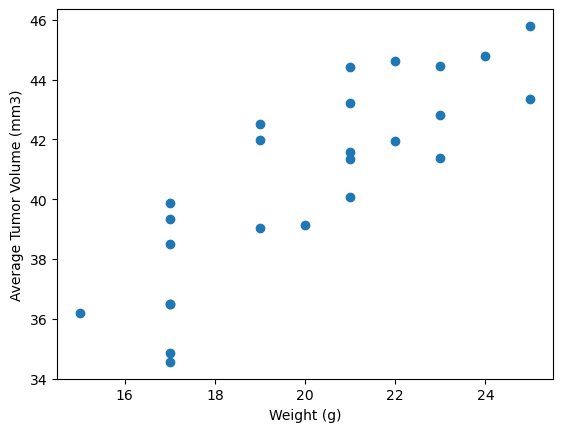

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

cap_table = cleaned_df.loc[cleaned_df['Drug Regimen'] == "Capomulin"]
cap_average = cap_table.groupby(['Mouse ID']).mean()
plt.scatter(cap_average['Weight (g)'],cap_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


<function matplotlib.pyplot.show(close=None, block=None)>

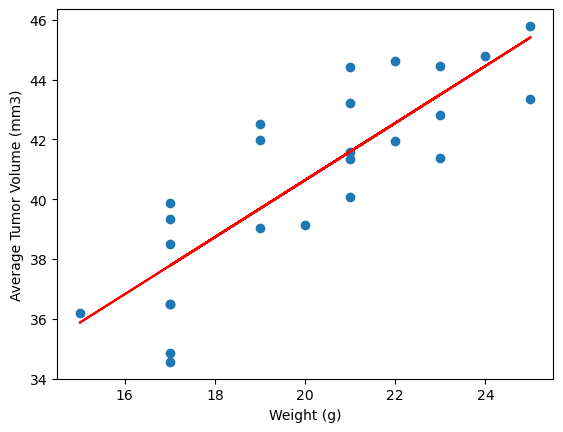

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation=round(st.pearsonr(cap_average['Weight (g)'],cap_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")
line = st.linregress(cap_average['Weight (g)'],cap_average['Tumor Volume (mm3)'])

y_values = cap_average['Weight (g)']*line[0]+line[1]
plt.scatter(cap_average['Weight (g)'],cap_average['Tumor Volume (mm3)'])
plt.plot(cap_average['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show